In [ ]:
#pip install --upgrade category_encoders


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Import Libraries

In [ ]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders.binary import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, VotingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error 

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

# 2. Read Dataset

In [ ]:
# read the data
df=pd.read_csv(r'/content/household_power_consumption.txt',sep=";")
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


# 3.Data Inspection

In [ ]:
print(df.dtypes)  #data types of variables
print(df.shape)   #dimension of data in rows & cols
print(df.describe())  #identify any patterns or relationships between the variables

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object
(1189153, 9)
       Sub_metering_3
count    1.185015e+06
mean     6.088587e+00
std      8.289541e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.700000e+01
max      3.100000e+01


#### Checking null values

In [ ]:
df.isnull().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              1
Sub_metering_3           4138
dtype: int64

In [ ]:
### taking 50,000 samples from original dataset without replacement
### reseting the index of records and dropping index 
data_sample=df.sample(n=50000, replace=False)
data_sample=data_sample.reset_index()
data_sample.drop('index', axis=1, inplace=True)#Inbuild Index is Dropped and bydefault index is considered.
data_sample.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/2/2009,01:42:00,0.486,0.192,244.900,2.000,0.000,0.000,0.0
1,17/8/2008,22:31:00,0.154,0.122,240.890,0.800,0.000,0.000,0.0
2,20/5/2008,22:27:00,1.136,0.136,240.340,4.800,0.000,2.000,1.0
3,2/2/2007,03:23:00,0.338,0.130,243.900,1.400,0.000,0.000,0.0
4,20/12/2007,18:20:00,2.460,0.046,241.190,10.200,0.000,0.000,18.0


In [ ]:
### checking shape of sampled dataset
data_sample.shape

(50000, 9)

In [ ]:
### saving sampled dataset to csv file
data_sample.to_csv('sampled_data.csv', index=False)

In [ ]:
# find the Unique Values
for i in[i for i in data_sample.columns]:
    print(i,{i:data_sample[i].unique()})

Date {'Date': array(['16/2/2009', '17/8/2008', '20/5/2008', '2/2/2007', '20/12/2007',
       '29/8/2007', '28/4/2007', '19/7/2007', '29/12/2008', '25/12/2007',
       '24/9/2007', '6/4/2008', '9/6/2008', '20/1/2007', '1/3/2007',
       '21/8/2007', '11/5/2007', '30/8/2008', '3/5/2008', '7/2/2008',
       '28/2/2008', '22/4/2007', '24/9/2008', '25/11/2008', '13/8/2007',
       '19/9/2007', '27/5/2008', '31/1/2008', '21/1/2008', '3/12/2007',
       '17/3/2008', '12/12/2008', '25/4/2008', '8/3/2009', '1/2/2009',
       '9/3/2008', '6/3/2008', '8/5/2008', '14/8/2008', '28/8/2008',
       '17/9/2007', '18/10/2007', '6/8/2007', '30/11/2007', '7/11/2007',
       '10/3/2009', '18/12/2006', '30/6/2008', '27/1/2007', '17/12/2008',
       '15/2/2007', '8/6/2007', '3/6/2008', '21/10/2008', '8/7/2008',
       '27/2/2007', '5/8/2008', '28/1/2009', '9/1/2008', '19/12/2008',
       '28/6/2008', '26/9/2007', '18/10/2008', '31/1/2009', '6/2/2008',
       '22/10/2007', '13/2/2008', '2/4/2007', '5/10/2007

# 4. Data Standerdizing

In [ ]:
# naming the variable with unqiue values.
for feature in [feature for feature in data_sample.columns if feature not in ['Date', 'Time']]:
 print("feature {} has these {} unique values\n".format(feature, data_sample[feature].unique()))



feature Global_active_power has these ['0.486' '0.154' '1.136' ... '7.972' '9.254' '6.524'] unique values

feature Global_reactive_power has these ['0.192' '0.122' '0.136' '0.130' '0.046' '0.134' '?' '0.098' '0.000'
 '0.238' '0.220' '0.100' '0.186' '0.170' '0.224' '0.092' '0.088' '0.398'
 '0.074' '0.124' '0.166' '0.140' '0.068' '0.168' '0.112' '0.050' '0.304'
 '0.188' '0.162' '0.270' '0.116' '0.128' '0.310' '0.216' '0.126' '0.052'
 '0.148' '0.178' '0.084' '0.094' '0.090' '0.314' '0.202' '0.182' '0.080'
 '0.194' '0.232' '0.114' '0.108' '0.172' '0.184' '0.144' '0.054' '0.102'
 '0.146' '0.458' '0.066' '0.096' '0.272' '0.200' '0.252' '0.262' '0.344'
 '0.318' '0.210' '0.274' '0.524' '0.330' '0.058' '0.060' '0.326' '0.138'
 '0.176' '0.082' '0.180' '0.234' '0.484' '0.346' '0.198' '0.196' '0.064'
 '0.214' '0.244' '0.150' '0.174' '0.218' '0.246' '0.160' '0.078' '0.132'
 '0.384' '0.312' '0.248' '0.106' '0.208' '0.254' '0.104' '0.118' '0.308'
 '0.154' '0.056' '0.258' '0.572' '0.602' '0.190' '0.14

In [ ]:

### checking no of records in each feature that have value as ?
for feature in [feature for feature in data_sample.columns if feature not in ['Date', 'Time']]:
 print("The feature {} has {} ? in it".format(feature,data_sample[data_sample[feature]=='?'].shape))


The feature Global_active_power has (177, 9) ? in it
The feature Global_reactive_power has (177, 9) ? in it
The feature Voltage has (177, 9) ? in it
The feature Global_intensity has (177, 9) ? in it
The feature Sub_metering_1 has (177, 9) ? in it
The feature Sub_metering_2 has (177, 9) ? in it
The feature Sub_metering_3 has (0, 9) ? in it


In [ ]:
### replacing ? values with nan values
data_sample.replace('?', np.nan, inplace=True)

In [ ]:
### checking no of records in each feature that have value as ?
for feature in [feature for feature in data_sample.columns if feature not in ['Date', 'Time']]:
 print("The feature {} has {} ? in it".format(feature,data_sample[data_sample[feature]=='?'].shape))

The feature Global_active_power has (0, 9) ? in it
The feature Global_reactive_power has (0, 9) ? in it
The feature Voltage has (0, 9) ? in it
The feature Global_intensity has (0, 9) ? in it
The feature Sub_metering_1 has (0, 9) ? in it
The feature Sub_metering_2 has (0, 9) ? in it
The feature Sub_metering_3 has (0, 9) ? in it


In [ ]:
# Checking of Uniquely Converted Values and sum.
data_sample.isnull().sum()

Date                       0
Time                       0
Global_active_power      177
Global_reactive_power    177
Voltage                  177
Global_intensity         177
Sub_metering_1           177
Sub_metering_2           177
Sub_metering_3           177
dtype: int64

In [ ]:
## dropping nan values
data_sample.dropna(inplace=True)


In [ ]:
data_sample.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49823 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   49823 non-null  object 
 1   Time                   49823 non-null  object 
 2   Global_active_power    49823 non-null  object 
 3   Global_reactive_power  49823 non-null  object 
 4   Voltage                49823 non-null  object 
 5   Global_intensity       49823 non-null  object 
 6   Sub_metering_1         49823 non-null  object 
 7   Sub_metering_2         49823 non-null  object 
 8   Sub_metering_3         49823 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.8+ MB


In [ ]:
### checking values in Sub_metering_1 feature 

# observation: all values are integers but in float data type so can be converted to int data type
data_sample.Sub_metering_1.unique()

array(['0.000', '1.000', '20.000', '2.000', '37.000', '36.000', '38.000',
       '39.000', '23.000', '35.000', '16.000', '17.000', '33.000',
       '19.000', '18.000', '21.000', '22.000', '29.000', '6.000',
       '32.000', '11.000', '27.000', '4.000', '14.000', '12.000',
       '42.000', '31.000', '40.000', '5.000', '28.000', '3.000', '26.000',
       '13.000', '44.000', '48.000', '7.000', '30.000', '68.000',
       '72.000', '24.000', '43.000', '15.000', '8.000', '34.000',
       '10.000', '75.000', '74.000', '9.000', '25.000', '41.000',
       '45.000', '50.000', '80.000', '64.000', '76.000', '49.000',
       '56.000', '78.000', '71.000', '73.000', '51.000'], dtype=object)

Because of Float Values 0.000 Value is also considered as a number so null values are not Visible therefore we do the converstion of float to String 
to get the Nan values and then it will be easy to drop the values in integer format 

In [ ]:
### checking values in Sub_metering_2 feature 

# observation: all values are integers but in float data type so can be converted to int data type
data_sample.Sub_metering_2.unique()

array(['0.000', '2.000', '1.000', '38.000', '25.000', '7.000', '36.000',
       '39.000', '17.000', '20.000', '33.000', '35.000', '21.000',
       '30.000', '31.000', '5.000', '22.000', '72.000', '9.000', '3.000',
       '37.000', '4.000', '71.000', '24.000', '75.000', '11.000',
       '32.000', '6.000', '18.000', '28.000', '34.000', '27.000',
       '15.000', '12.000', '29.000', '26.000', '73.000', '40.000',
       '8.000', '70.000', '13.000', '23.000', '51.000', '16.000',
       '41.000', '74.000', '19.000', '62.000', '56.000', '64.000',
       '42.000', '14.000', '59.000', '60.000', '48.000', '67.000',
       '10.000', '66.000', '58.000', '65.000', '45.000', '57.000',
       '46.000', '61.000', '44.000', '68.000', '54.000', '55.000',
       '43.000', '69.000', '53.000', '52.000', '50.000', '63.000'],
      dtype=object)

In [ ]:
### checking values in Sub_metering_3 feature
 
# observation: all values are integers but in float data type so can be converted to int data type
data_sample.Sub_metering_3.unique()

array([ 0.,  1., 18., 17., 28., 19., 30., 16.,  9., 12., 11., 10.,  7.,
       15.,  2., 24., 14., 13., 27., 29., 22.,  5.,  3.,  8.,  6.,  4.,
       25., 31., 20., 21., 23., 26.])

In [ ]:
### converting to str datatype so replace function can be used.
data_sample['Sub_metering_3']= data_sample['Sub_metering_3'].astype(str)

In [ ]:
data_sample.Sub_metering_3.unique()

array(['0.0', '1.0', '18.0', '17.0', '28.0', '19.0', '30.0', '16.0',
       '9.0', '12.0', '11.0', '10.0', '7.0', '15.0', '2.0', '24.0',
       '14.0', '13.0', '27.0', '29.0', '22.0', '5.0', '3.0', '8.0', '6.0',
       '4.0', '25.0', '31.0', '20.0', '21.0', '23.0', '26.0'],
      dtype=object)

In [ ]:
# Converting float to string and then spliting depending upon the index number.
data_sample['Sub_metering_1']= data_sample['Sub_metering_1'].str.split(".", expand=True)[0] # [0] is used for indexing
data_sample['Sub_metering_2']= data_sample['Sub_metering_2'].str.split(".", expand=True)[0]
data_sample['Sub_metering_3']= data_sample['Sub_metering_3'].str.split(".", expand=True)[0]



 "2.0" as the value is converted in string the indexing itself starts from 0 hence 2 is the 0th index 
as mentioned in the code [0] == 2 helps in fatching the value.(where . is also considered as a part of index )

In [ ]:
### checking integer values
data_sample.Sub_metering_1.unique()

array(['0', '1', '20', '2', '37', '36', '38', '39', '23', '35', '16',
       '17', '33', '19', '18', '21', '22', '29', '6', '32', '11', '27',
       '4', '14', '12', '42', '31', '40', '5', '28', '3', '26', '13',
       '44', '48', '7', '30', '68', '72', '24', '43', '15', '8', '34',
       '10', '75', '74', '9', '25', '41', '45', '50', '80', '64', '76',
       '49', '56', '78', '71', '73', '51'], dtype=object)

In [ ]:
### checking integer values
data_sample.Sub_metering_2.unique()


array(['0', '2', '1', '38', '25', '7', '36', '39', '17', '20', '33', '35',
       '21', '30', '31', '5', '22', '72', '9', '3', '37', '4', '71', '24',
       '75', '11', '32', '6', '18', '28', '34', '27', '15', '12', '29',
       '26', '73', '40', '8', '70', '13', '23', '51', '16', '41', '74',
       '19', '62', '56', '64', '42', '14', '59', '60', '48', '67', '10',
       '66', '58', '65', '45', '57', '46', '61', '44', '68', '54', '55',
       '43', '69', '53', '52', '50', '63'], dtype=object)

In [ ]:
### checking integer values
data_sample.Sub_metering_3.unique()

array(['0', '1', '18', '17', '28', '19', '30', '16', '9', '12', '11',
       '10', '7', '15', '2', '24', '14', '13', '27', '29', '22', '5', '3',
       '8', '6', '4', '25', '31', '20', '21', '23', '26'], dtype=object)

In [ ]:
### checking null values
data_sample.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
# dropping null values
data_sample.dropna(inplace=True)

In [ ]:
### checking data type and null values
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49823 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   49823 non-null  object
 1   Time                   49823 non-null  object
 2   Global_active_power    49823 non-null  object
 3   Global_reactive_power  49823 non-null  object
 4   Voltage                49823 non-null  object
 5   Global_intensity       49823 non-null  object
 6   Sub_metering_1         49823 non-null  object
 7   Sub_metering_2         49823 non-null  object
 8   Sub_metering_3         49823 non-null  object
dtypes: object(9)
memory usage: 3.8+ MB


In [ ]:
### creating dict of data type conversion
datatypes_convert={'Global_active_power':'float64', 'Global_reactive_power':'float64',
 'Voltage':'float64', 'Global_intensity':'float64', 'Sub_metering_1':'int64', 'Sub_metering_2':'int64',
 'Sub_metering_3':'int64'}


In [ ]:
### changing data type of numerical features to float or int
data_sample=data_sample.astype(datatypes_convert)
data_sample.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1             int64
Sub_metering_2             int64
Sub_metering_3             int64
dtype: object

In [ ]:
### converting datatype of Date feature to datetime
data_sample['Date']=pd.to_datetime(data_sample['Date'], format="%d/%m/%Y")


In [ ]:
### seperating day and month, creating new feature for day and month
data_sample['day']=data_sample['Date'].dt.day
data_sample['month']=data_sample['Date'].dt.month


In [ ]:
### dropping Time this is not important and Date is already used in day and month
data_sample.drop('Time', axis=1, inplace=True)
data_sample.drop('Date', axis=1, inplace=True)

In [ ]:
## checking values and features after data cleaning
data_sample.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month
0,0.486,0.192,244.90,2.0,0,0,0,16,2
1,0.154,0.122,240.89,0.8,0,0,0,17,8
2,1.136,0.136,240.34,4.8,0,2,1,20,5
3,0.338,0.130,243.90,1.4,0,0,0,2,2
4,2.460,0.046,241.19,10.2,0,0,18,20,12


In [ ]:
### checking null values 
data_sample.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
day                      0
month                    0
dtype: int64

In [ ]:
# Checking Data type
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49823 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    49823 non-null  float64
 1   Global_reactive_power  49823 non-null  float64
 2   Voltage                49823 non-null  float64
 3   Global_intensity       49823 non-null  float64
 4   Sub_metering_1         49823 non-null  int64  
 5   Sub_metering_2         49823 non-null  int64  
 6   Sub_metering_3         49823 non-null  int64  
 7   day                    49823 non-null  int64  
 8   month                  49823 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 3.8 MB


In [ ]:
# Till this step Data Cleaning Process is done 

**Creating Dependent Feature **
Combining All the Used Power in One Attribute.

In [ ]:
### Creating target feature as Total_power_use which is sum of Sub_metering_1,2 and 3
data_sample['Total_power_use']=data_sample['Sub_metering_1']+data_sample['Sub_metering_2']+data_sample['Sub_metering_3']
data_sample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,Total_power_use
0,0.486,0.192,244.90,2.0,0,0,0,16,2,0
1,0.154,0.122,240.89,0.8,0,0,0,17,8,0
2,1.136,0.136,240.34,4.8,0,2,1,20,5,3
3,0.338,0.130,243.90,1.4,0,0,0,2,2,0
4,2.460,0.046,241.19,10.2,0,0,18,20,12,18


In [ ]:
### saving cleaned dataset to csv
data_sample.to_csv('household_power_consumption_cleaned.csv', index=False)


# 5. EDA

In [ ]:
### Getting difference in min and max values of feature
data_sample.max()-data_sample.min()

Global_active_power        9.998
Global_reactive_power      1.148
Voltage                   28.220
Global_intensity          43.200
Sub_metering_1            80.000
Sub_metering_2            75.000
Sub_metering_3            31.000
day                       30.000
month                     11.000
Total_power_use          127.000
dtype: float64

Numerical Feature 

In [ ]:
### Getting list of numerical features
numerical_features=data_sample.columns
print(numerical_features)

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'day', 'month', 'Total_power_use'],
      dtype='object')


In [ ]:
### getting count of unique values in each numerical feature
for feature in numerical_features:
 print("Feature {} has {} no. of unique values".format(feature, data_sample[feature].nunique()))

Feature Global_active_power has 2768 no. of unique values
Feature Global_reactive_power has 344 no. of unique values
Feature Voltage has 2102 no. of unique values
Feature Global_intensity has 178 no. of unique values
Feature Sub_metering_1 has 61 no. of unique values
Feature Sub_metering_2 has 74 no. of unique values
Feature Sub_metering_3 has 32 no. of unique values
Feature day has 31 no. of unique values
Feature month has 12 no. of unique values
Feature Total_power_use has 108 no. of unique values


Checking Outliers

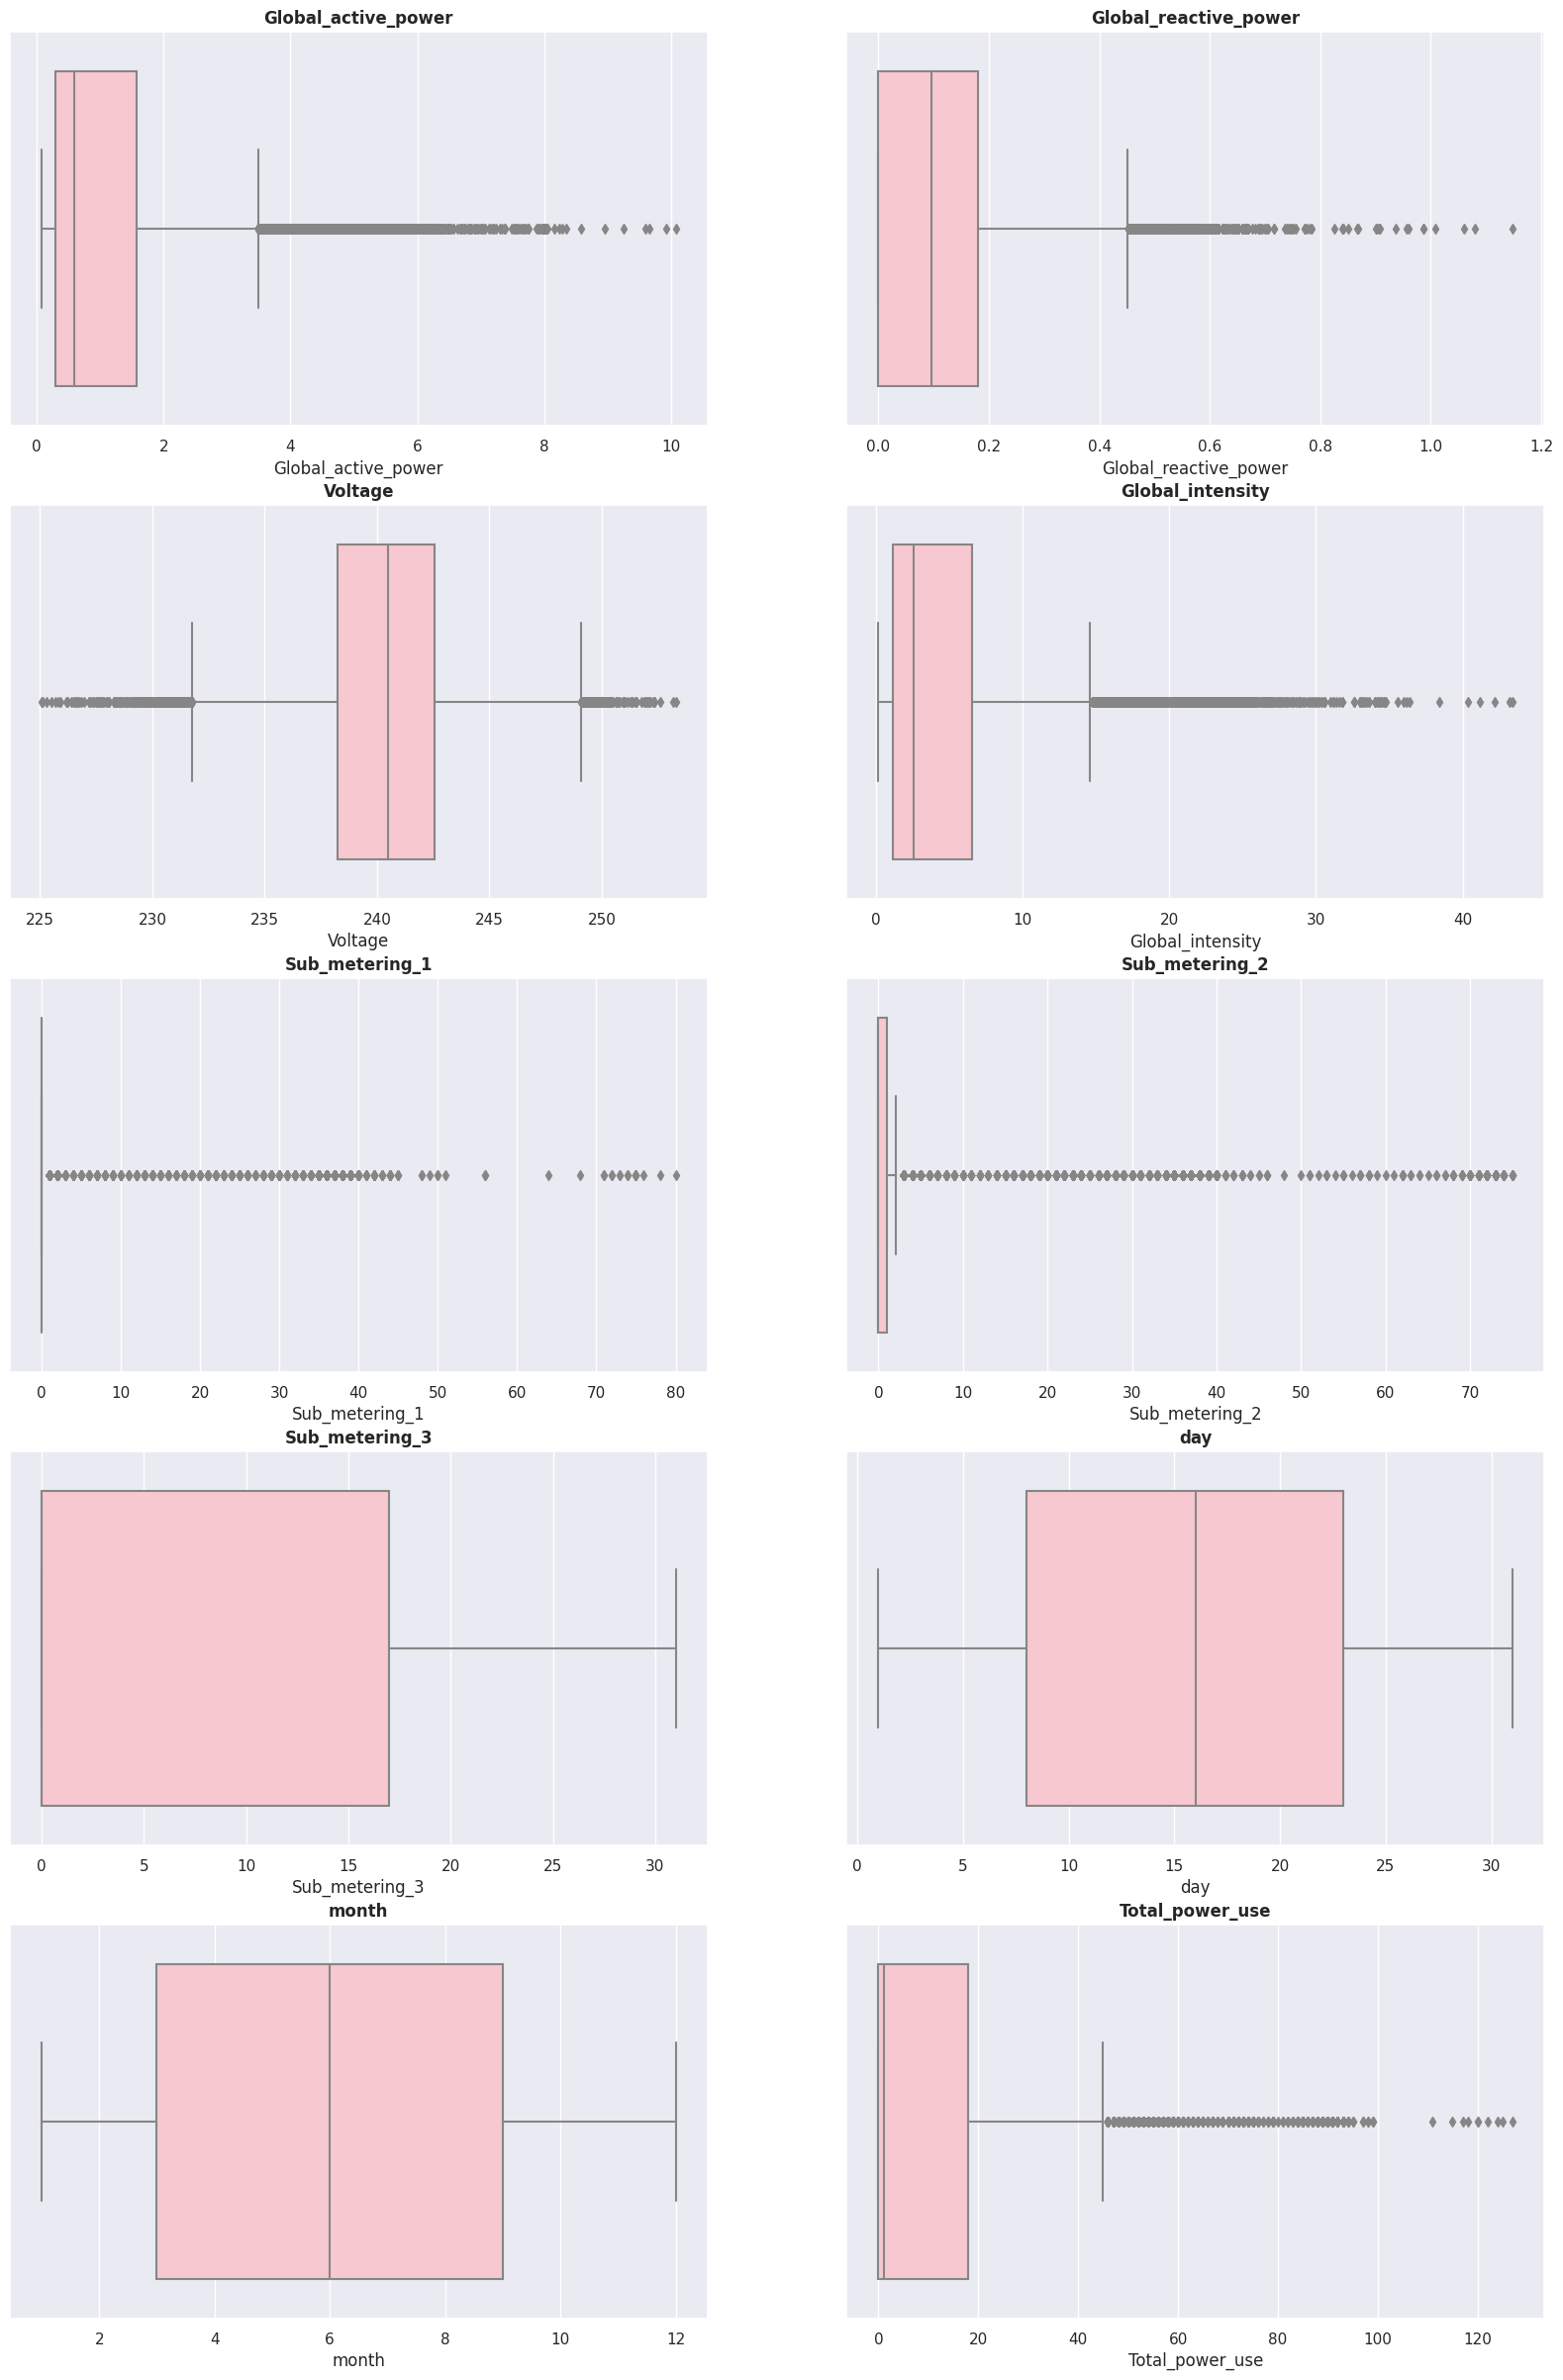

In [ ]:
### Method 1: Checking outliers in numerical features
plt.figure(figsize=(20,30))
for i in enumerate(data_sample):
 plt.subplot(5, 2, i[0]+1)
 sns.set(rc={'figure.figsize':(10,6)})
 sns.boxplot(data=data_sample, x=i[1], color='pink')
 plt.title("{}".format(i[1]), fontweight="bold")


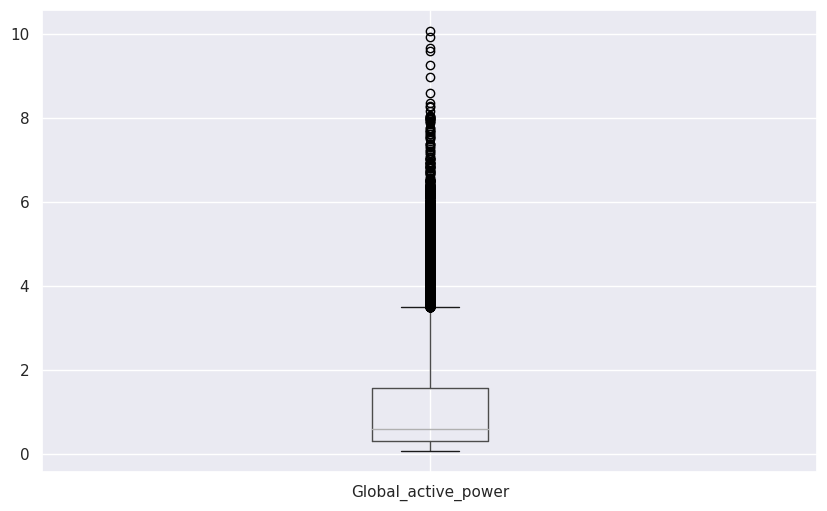

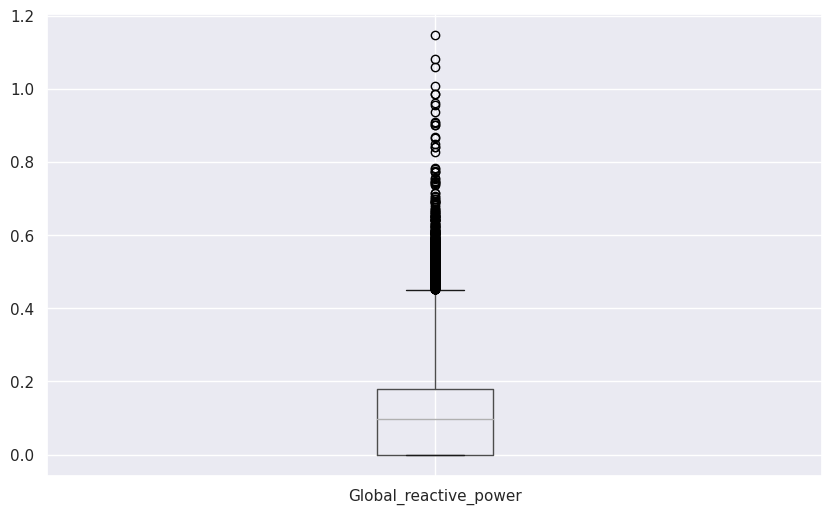

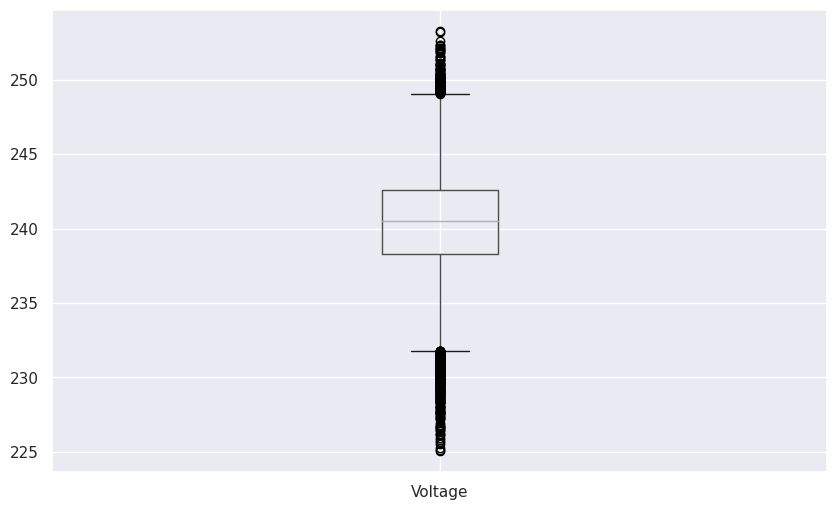

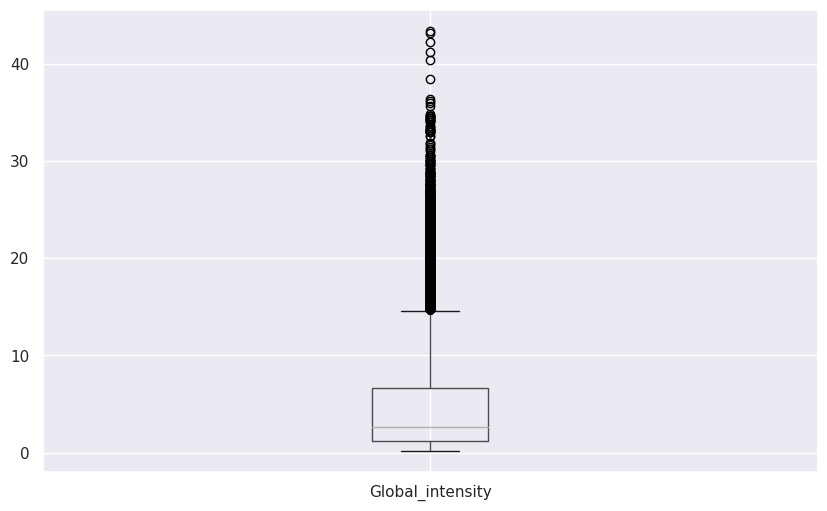

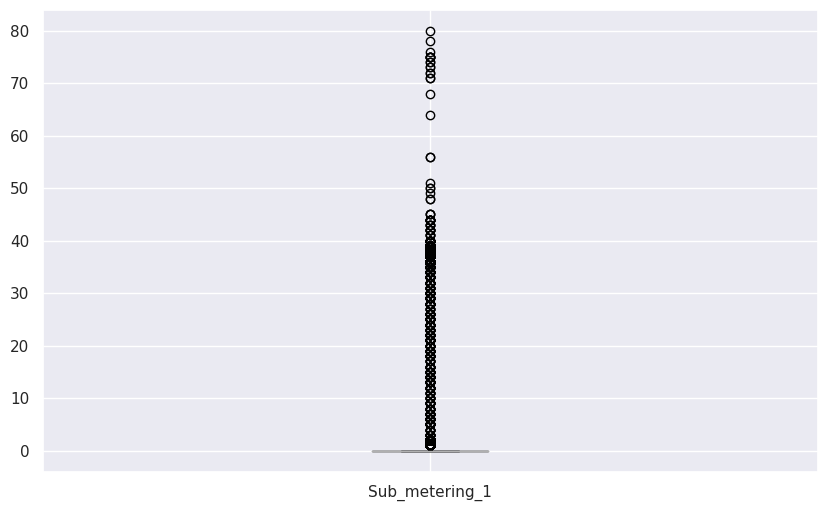

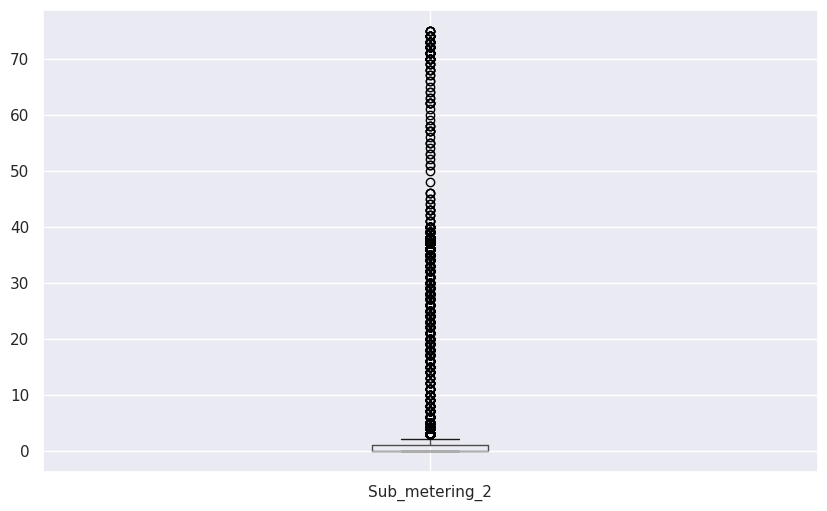

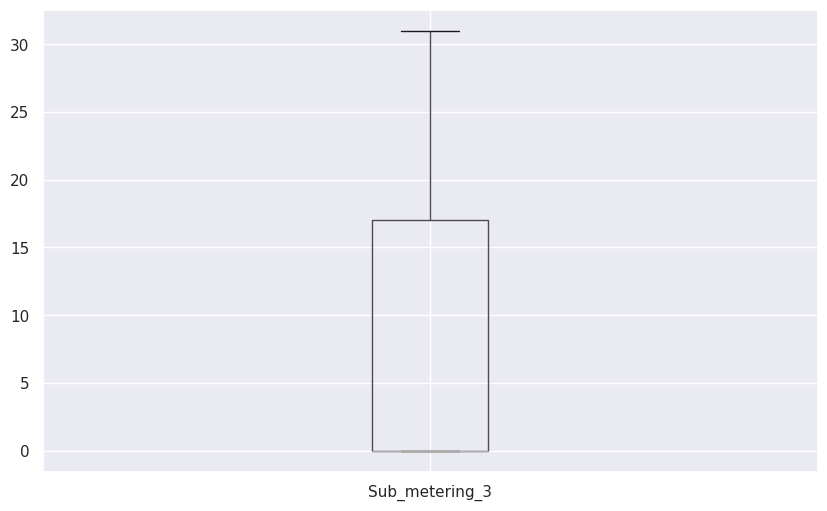

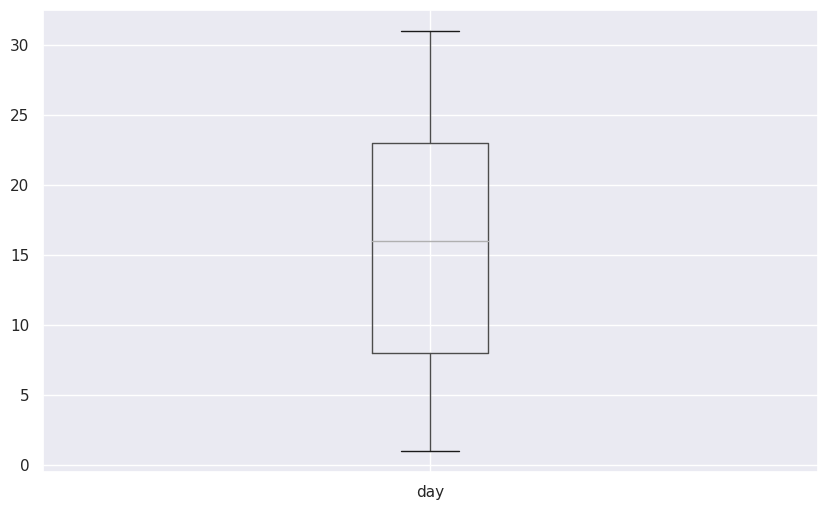

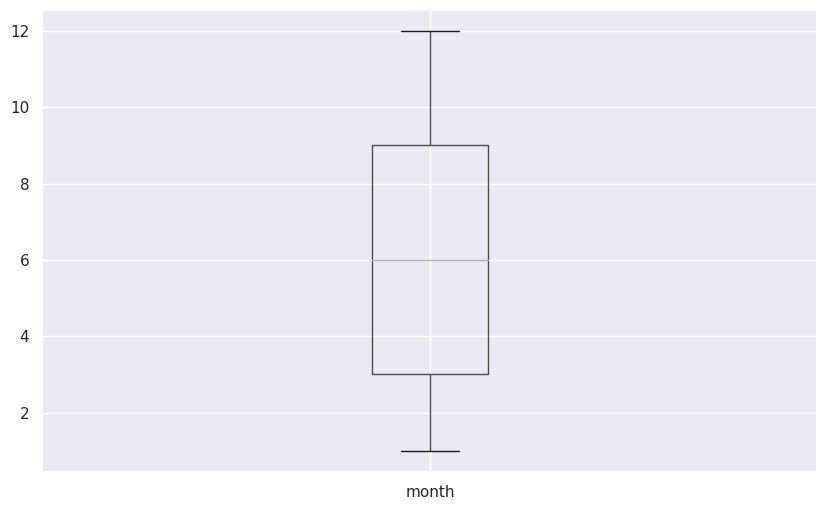

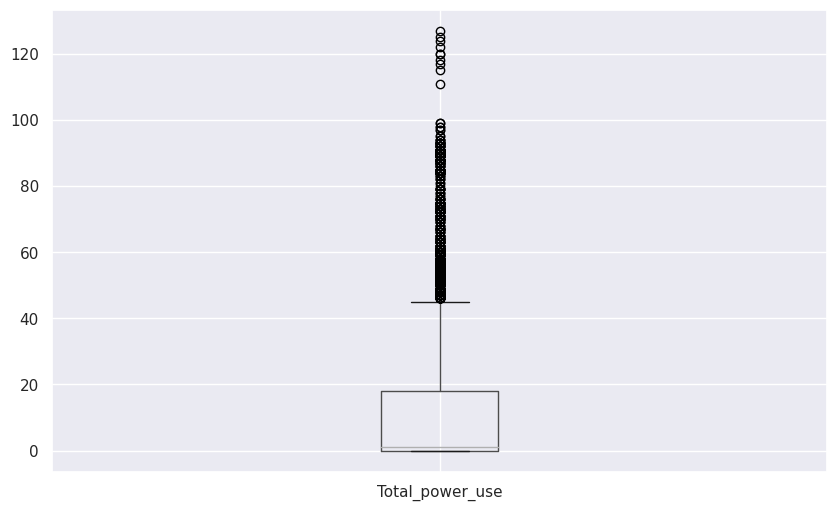

In [ ]:
### Method 2:

for i in data_sample.columns:   
    data_sample.boxplot(column=i)   
    plt.show()

**Correlation and Heat Map**

In [ ]:
corr=round(data_sample.corr(),2)
corr

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,Total_power_use
Global_active_power,1.00,0.26,-0.39,1.00,0.48,0.46,0.62,0.00,-0.03,0.84
Global_reactive_power,0.26,1.00,-0.14,0.28,0.13,0.16,0.09,-0.01,-0.00,0.19
Voltage,-0.39,-0.14,1.00,-0.41,-0.20,-0.17,-0.28,0.04,-0.04,-0.35
Global_intensity,1.00,0.28,-0.41,1.00,0.49,0.46,0.61,-0.00,-0.03,0.83
Sub_metering_1,0.48,0.13,-0.20,0.49,1.00,0.06,0.11,-0.01,-0.01,0.58
Sub_metering_2,0.46,0.16,-0.17,0.46,0.06,1.00,0.11,-0.00,-0.01,0.57
Sub_metering_3,0.62,0.09,-0.28,0.61,0.11,0.11,1.00,-0.00,-0.02,0.72
day,0.00,-0.01,0.04,-0.00,-0.01,-0.00,-0.00,1.00,0.05,-0.00
month,-0.03,-0.00,-0.04,-0.03,-0.01,-0.01,-0.02,0.05,1.00,-0.02
Total_power_use,0.84,0.19,-0.35,0.83,0.58,0.57,0.72,-0.00,-0.02,1.00


<Axes: >

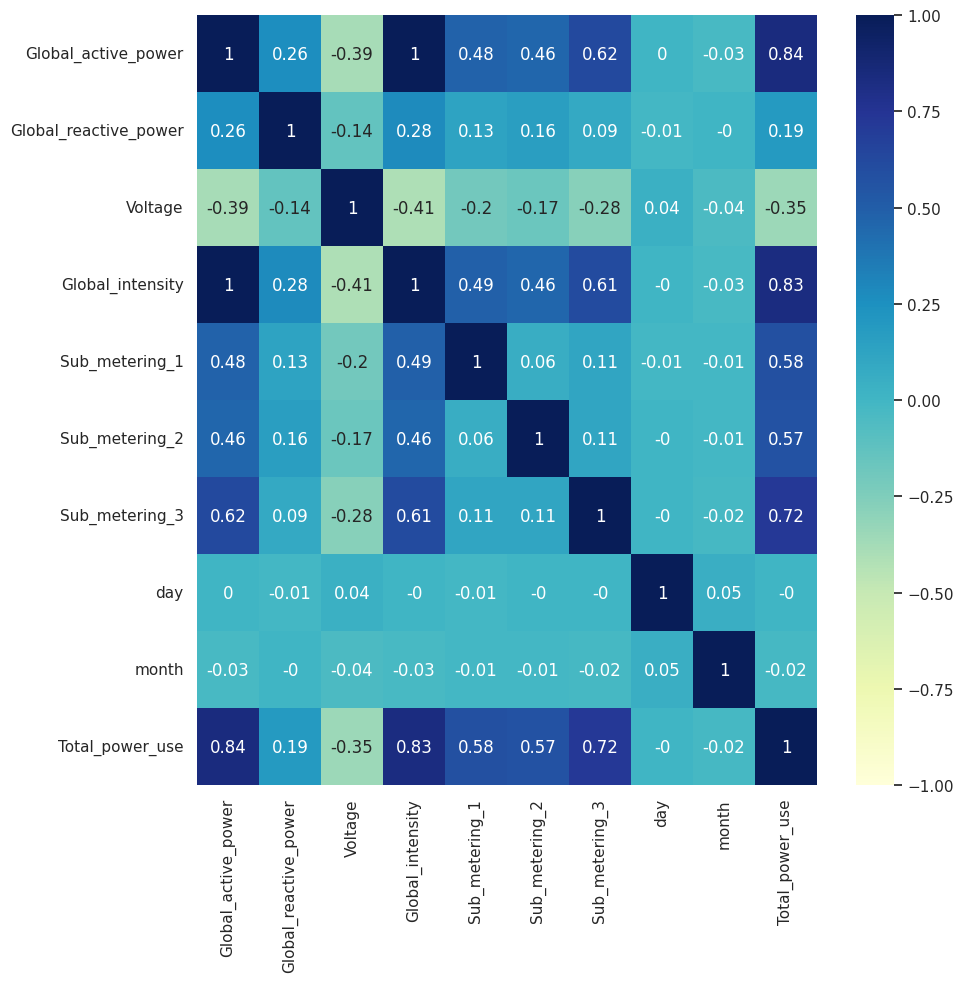

In [ ]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(data=corr, annot=True, vmin=-1, vmax=1, cmap="YlGnBu")

From above heatmap we can see that there's a lack of correlation between the columns in this data. However, there is some correlation between Total_power_use and Global_active_power,etc.

**Creating X and Y**

In [ ]:
### Splitting data into independent feature dataframe and dependent feature series
X=data_sample.iloc[:,:-1]
y=data_sample.iloc[:,-1]
X.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month
0,0.486,0.192,244.90,2.0,0,0,0,16,2
1,0.154,0.122,240.89,0.8,0,0,0,17,8
2,1.136,0.136,240.34,4.8,0,2,1,20,5
3,0.338,0.130,243.90,1.4,0,0,0,2,2
4,2.460,0.046,241.19,10.2,0,0,18,20,12


In [ ]:
y.head()

0     0
1     0
2     3
3     0
4    18
Name: Total_power_use, dtype: int64

In [ ]:
### Importt libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import r2_score


**Train Test Split**

In [ ]:
### random state train test split will be same with all people using random_state=10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(34876, 9)
(34876,)
(14947, 9)
(14947,)


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

# 6. Model Building

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
#create a model object
lm=LinearRegression()

#10.b
#train the model object
lm.fit(X_train,y_train)

#10.c
#print intercept and coefficients
print(lm.intercept_)   #accepts equation parameter
print(lm.coef_)

-6.572520305780927e-14
[ 7.00488650e-15 -4.44089210e-15  1.38777878e-16 -1.99840144e-15
  1.00000000e+00  1.00000000e+00  1.00000000e+00  9.36371206e-16
 -4.71844785e-16]


**Predict Depending Upon the Model**

In [ ]:
linear_reg_pred=lm.predict(X_test)
linear_reg_pred


array([ 1.00000000e+00,  2.00000000e+00, -1.56229208e-14, ...,
       -1.32873569e-14,  3.00000000e+00,  1.70000000e+01])

In [ ]:
r2score_linear_reg=r2_score(y_test, linear_reg_pred)
print("Our Linear Regression model has {} % accuracy".format(round(r2score_linear_reg*100,3)))

Our Linear Regression model has 100.0 % accuracy


**Check r2 Score, Mean Squared Error, Adjusted R Sqaure**

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error   #module name metrics
import numpy as np 

r2=r2_score(y_test,linear_reg_pred)    #y actual,y predic
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,linear_reg_pred))
print("RMSE:",rmse)  

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 1.0
RMSE: 3.35235957123725e-14
Adj R-square: 1.0


**Ridge**

In [ ]:
from sklearn.linear_model import Ridge
lm = Ridge()
lm.fit(X_train,y_train)

#print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

4.202849161849542e-05
[ 2.46148938e-05 -3.19884038e-06 -1.89895586e-07 -2.12803194e-06
  9.99998286e-01  9.99998341e-01  9.99998500e-01 -1.36273239e-08
  3.08667781e-08]


In [ ]:
linear_reg_pred=lm.predict(X_test)
linear_reg_pred

array([1.00000259e+00, 1.99999688e+00, 6.31815629e-07, ...,
       1.31730968e-05, 2.99999555e+00, 1.69999905e+01])

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error   #module name metrics
import numpy as np 

r2_ridge=r2_score(y_test,linear_reg_pred)    #y actual,y predic
print("R-squared:",r2_ridge)

rmse=np.sqrt(mean_squared_error(y_test,linear_reg_pred))
print("RMSE:",rmse)  

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9999999999992236
RMSE: 1.1829815877585682e-05
Adj R-square: 1.0


**Lasso**

In [ ]:
from sklearn.linear_model import Lasso
lm = Lasso()
lm.fit(X_train,y_train)

#print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

0.1248254211587092
[ 0.          0.         -0.          0.          0.97887512  0.97809296
  0.98897682 -0.         -0.        ]


In [ ]:
linear_reg_pred=lm.predict(X_test)
linear_reg_pred

array([ 1.10291838,  2.0918952 ,  0.12482542, ...,  0.12482542,
        3.06998816, 16.93743139])

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error   #module name metrics
import numpy as np 

r2_lasso=r2_score(y_test,linear_reg_pred)    #y actual,y predic
print("R-squared:",r2_lasso)

rmse=np.sqrt(mean_squared_error(y_test,linear_reg_pred))
print("RMSE:",rmse)  

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9996988321865962
RMSE: 0.2329961410584697
Adj R-square: 1.0


# 7. Conclusion

In [ ]:
print("Accuracy of all the models is as below:\n")
print("Linear Regression: {} %\nRidge Regression: {} %\nLasso Regression: {} ".format(round(r2score_linear_reg*100,3),round(r2_ridge*100,3),round(r2_lasso*100,3)))
#print("Support Vector Regressor: {} %\n".format(round(r2score_svr*100,3)))

print("Best Model is 'Linear Regression' and 'Ridge Regression'")


Accuracy of all the models is as below:

Linear Regression: 100.0 %
Ridge Regression: 100.0 %
Lasso Regression: 99.97 
Best Model is 'Linear Regression' and 'Ridge Regression'
